In [4]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 435.7 kB/s eta 0:01:29
   ---------------------------------------- 0.1/38.6 MB 651.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.6 MB 798.9 kB/s eta 0:00:49
   ---------------------------------------- 0.2/38.6 MB 893.0 kB/s eta 0:00:44
   ---------------------------------------- 0.3/38.6 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.6 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.4/38.6 MB 1.2 MB/s eta 0:00:31
    --------------------------------------- 0.5/38.6 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.6/38.6 MB 1.3 MB/s eta 0:00:30
    --------------------------------------- 0.6/38.6 MB 1.2 MB/s eta 0:00:31
    --------------------------------------- 0.7/38.6 MB 1.2 MB/s eta 0:00:31
    -

In [7]:
#import tensorflow dependencies
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D,Input,Flatten


In [8]:
#Setting up GPU
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')#taking all the gpus available on our machine
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)#setting all the gpus available on device for memory growth


In [9]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')#image like the iamge captured by webcam
NEG_PATH = os.path.join('data', 'negative')#image unlike the image captured by webcam
ANC_PATH = os.path.join('data', 'anchor')#image captured by webcam

In [10]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [12]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [13]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [14]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [15]:
# Import uuid library to generate unique image names
import uuid

In [36]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\f1b1702d-2159-11ef-8513-c038966e5e84.jpg'

In [43]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)  # Adjust the camera index if needed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Check the frame dimensions
    height, width, _ = frame.shape
    
    # Adjust cropping indices as needed
    # Example: center crop to 250x250px
    start_x = max(0, width//2 - 125)
    start_y = max(0, height//2 - 125)
    end_x = start_x + 250
    end_y = start_y + 250

    cropped_frame = frame[start_y:end_y, start_x:end_x]

    # Collect anchors
    if cv2.waitKey(1) & 0xFF == ord('a'):
        # Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, cropped_frame)
        print(f'Anchor image saved: {imgname}')
    
    # Collect positives
    if cv2.waitKey(1) & 0xFF == ord('p'):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, cropped_frame)
        print(f'Positive image saved: {imgname}')
    
    # Show image back to screen
    cv2.imshow('Image Collection', cropped_frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

Positive image saved: data\positive\85780125-215b-11ef-9765-c038966e5e84.jpg
Positive image saved: data\positive\87a36256-215b-11ef-950c-c038966e5e84.jpg
Positive image saved: data\positive\884ad3ae-215b-11ef-926a-c038966e5e84.jpg
Positive image saved: data\positive\88fbccf9-215b-11ef-ab71-c038966e5e84.jpg
Positive image saved: data\positive\89bd258a-215b-11ef-9255-c038966e5e84.jpg
Positive image saved: data\positive\8a986654-215b-11ef-b965-c038966e5e84.jpg
Positive image saved: data\positive\8d4f4949-215b-11ef-9d78-c038966e5e84.jpg
Positive image saved: data\positive\8de72baf-215b-11ef-adb9-c038966e5e84.jpg
Positive image saved: data\positive\8e199d80-215b-11ef-a9ce-c038966e5e84.jpg
Positive image saved: data\positive\8e5dbc4b-215b-11ef-ba9c-c038966e5e84.jpg
Positive image saved: data\positive\8eb9da5d-215b-11ef-87dd-c038966e5e84.jpg
Positive image saved: data\positive\8eeb9a39-215b-11ef-a1cc-c038966e5e84.jpg
Positive image saved: data\positive\8fd21ac2-215b-11ef-8313-c038966e5e84.jpg

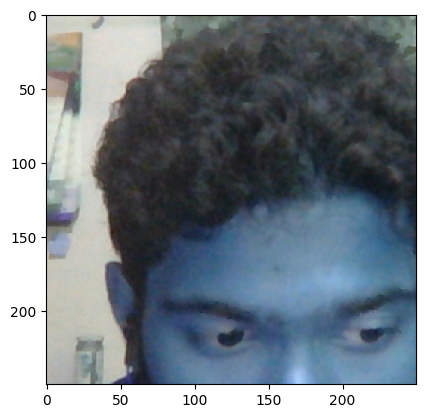

In [44]:
plt.imshow(frame[120:120+250,200:200+250, :])

Load and Preprocess Images
3.1 Get Image Directories

In [46]:
# List image files and take a subset
anchor = tf.data.Dataset.list_files(rf'{ANC_PATH}/*.jpg').take(300)
positive = tf.data.Dataset.list_files(rf'{POS_PATH}/*.jpg').take(300)
negative = tf.data.Dataset.list_files(rf'{NEG_PATH}/*.jpg').take(300)

In [47]:
dir_test = anchor.as_numpy_iterator()

In [48]:
print(dir_test.next())

b'data\\anchor\\6a9be5b9-215b-11ef-a2dd-c038966e5e84.jpg'


3.2 Preprocessing - Scale and Resize

In [49]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [51]:
img = preprocess('data\\anchor\\6a9be5b9-215b-11ef-a2dd-c038966e5e84.jpg')

In [52]:
img.numpy().max()

1.0

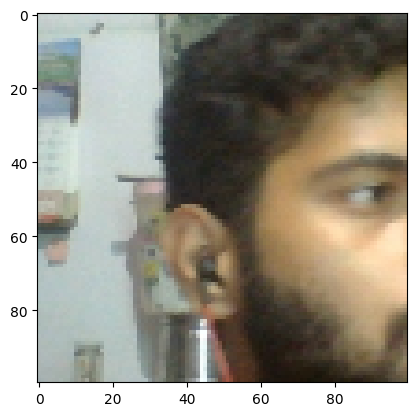

In [53]:
plt.imshow(img)

3.3 Create Labelled Dataset
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [57]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [58]:
samples = data.as_numpy_iterator()

In [59]:
exampple = samples.next()

In [60]:
exampple

(b'data\\anchor\\2f5f7e08-2159-11ef-a51c-c038966e5e84.jpg',
 b'data\\positive\\9220e7c0-215b-11ef-b54c-c038966e5e84.jpg',
 1.0)

3.4 Build Train and Test Partition

In [61]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [62]:
res = preprocess_twin(*exampple)#* for unpacking images

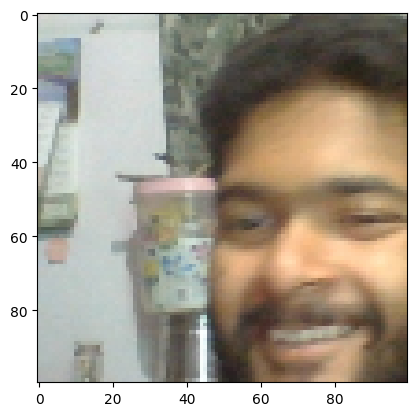

In [63]:
plt.imshow(res[1])

In [64]:
res[2]

1.0

In [65]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [66]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [67]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

4. Model Engineering
4.1 Build Embedding Layer

In [ ]:
inp = Input(shape=(100,100,3), name='input_image')

In [ ]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [ ]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [ ]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [ ]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [ ]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [ ]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
mod.summary()


In [ ]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()